In [21]:
 import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
import h5py

Loading dataset

In [24]:
all_dataset = h5py.File('/content/datasets.hdf5', 'r')
print("Keys: ", list(all_dataset.keys()))

X_train = np.array(all_dataset["train_set_X"])
y_train = np.array(all_dataset["train_set_y"])


X_val = np.array(all_dataset["val_set_X"])
y_val = np.array(all_dataset["val_set_y"])


X_eval = np.array(all_dataset["eval_set_X"])
y_eval = np.array(all_dataset["eval_set_y"])


print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_val shape = ", X_val.shape)
print("y_val shape = ", y_val.shape)
print("X_eval shape = ", X_eval.shape)
print("y_eval shape = ", y_eval.shape)

Keys:  ['eval_set_X', 'eval_set_y', 'train_set_X', 'train_set_y', 'val_set_X', 'val_set_y']
X_train shape =  (3000, 64, 64, 3)
y_train shape =  (3000,)
X_val shape =  (1000, 64, 64, 3)
y_val shape =  (1000,)
X_eval shape =  (1000, 64, 64, 3)
y_eval shape =  (1000,)


reshaping y's

In [25]:
y_train = y_train.reshape(3000,1)
y_val = y_val.reshape(1000,1)
y_eval = y_eval.reshape(1000,1)


print("=========== Reshaped Y's =============")
print("y_train shape = ", y_train.shape)
print("y_val shape = ", y_val.shape)
print("y_eval shape = ", y_eval.shape)

=========== Reshaped Y's =============
y_train shape =  (3000, 1)
y_val shape =  (1000, 1)
y_eval shape =  (1000, 1)


Normalizing features

In [26]:
X_train_norm = X_train/255.0
X_val_norm = X_val/255.0
X_eval_norm = X_eval/255.0


print("------- Normalized features ---------")
print("X_train_norm shape = ", X_train_norm.shape)
print("X_val_norm shape = ", X_val_norm.shape)
print("X_eval_norm shape = ", X_eval_norm.shape)


------- Normalized features ---------
X_train_norm shape =  (3000, 64, 64, 3)
X_val_norm shape =  (1000, 64, 64, 3)
X_eval_norm shape =  (1000, 64, 64, 3)


Final dataset

In [27]:
print("==================================================================")
print("Number of train examples = ", X_train_norm.shape[0])
print("Number of validation examples = ", X_val_norm.shape[0])
print("Number of evaluation examples = ", X_eval_norm.shape[0])
print("- - - - - - - - - - - - - - - - - - - - - - - ")
print("X_train_norm shape = ", X_train_norm.shape)
print("y_train shape = ", y_train.shape)
print("X_val_norm shape = ", X_val_norm.shape)
print("y_val shape = ", y_val.shape)
print("X_eval_norm shape = ", X_eval_norm.shape)
print("y_eval shape = ", y_eval.shape)
print("==================================================================")

Number of train examples =  3000
Number of validation examples =  1000
Number of evaluation examples =  1000
- - - - - - - - - - - - - - - - - - - - - - - 
X_train_norm shape =  (3000, 64, 64, 3)
y_train shape =  (3000, 1)
X_val_norm shape =  (1000, 64, 64, 3)
y_val shape =  (1000, 1)
X_eval_norm shape =  (1000, 64, 64, 3)
y_eval shape =  (1000, 1)


display image

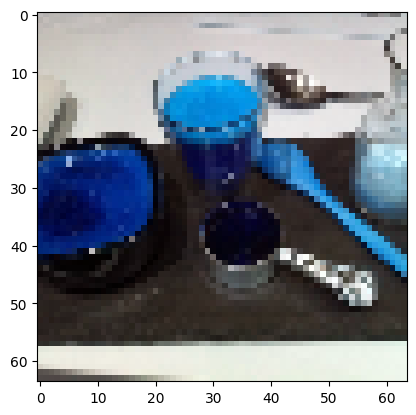

In [28]:

index = 100
plt.imshow(X_train[index]) #display sample training image
plt.show()

building keras' Sequential model

In [29]:
def foodModel():

  model = tf.keras.Sequential([
                               tf.keras.layers.ZeroPadding2D(padding=3, input_shape = (64,64,3)),
                               tf.keras.layers.Conv2D(64, (11,11), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),

                               tf.keras.layers.Conv2D(64, (2,2), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),


                               tf.keras.layers.Conv2D(64, (2,2), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),

                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
  return model

compile foodModel()

In [30]:
food_model = foodModel()


food_model.compile(optimizer='adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


summary of food_model

In [31]:

food_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 60, 60, 64)          │          23,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,265 (231.50 KB)

 Trainable params: 58,881 (230.00 KB)

 Non-trainable params: 384 (1.50 KB)

train model

In [32]:
food_model.fit(X_train_norm, y_train, epochs=12, batch_size=32)

Epoch 1/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 781ms/step - accuracy: 0.7649 - loss: 0.5039
Epoch 2/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 75s 713ms/step - accuracy: 0.8639 - loss: 0.3137
Epoch 3/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 706ms/step - accuracy: 0.8773 - loss: 0.2860
Epoch 4/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 746ms/step - accuracy: 0.9094 - loss: 0.2248
Epoch 5/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 76s 678ms/step - accuracy: 0.9023 - loss: 0.2256
Epoch 6/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.9278 - loss: 0.1790
Epoch 7/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 684ms/step - accuracy: 0.9393 - loss: 0.1535
Epoch 8/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.9424 - loss: 0.1375
Epoch 9/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 80s 660ms/step - accuracy: 0.9638 - loss: 0.1060
Epoch 10/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 678ms/step - accuracy: 0.9743 - loss: 0.0813
Epoch 11/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 677ms/step - accuracy: 0.9714 - loss: 0.0850
Epoch 12/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 84

evaluate model

In [33]:
food_model.evaluate(X_val_norm, y_val)
food_model.save("my_food_model(88_99).h5")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8222 - loss: 0.4400
